# Modeling — League of Legends Match Outcome Prediction

In this notebook we:
- Load preprocessed features and labels
- Split into train/test sets
- Train a baseline RandomForest model
- Evaluate performance with accuracy, ROC-AUC, and classification report
- Inspect feature importance

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import joblib

# Load engineered features and labels
X = pd.read_csv("../data/features.csv")
y = pd.read_csv("../data/labels.csv").squeeze()  # squeeze turns DataFrame -> Series

print("Features shape:", X.shape)
print("Labels shape:", y.shape)

Features shape: (51490, 566)
Labels shape: (51490,)


## 1. Train/Test Split
We stratify to keep the win/loss balance consistent across splits.

In [2]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)

Train size: (41192, 566) Test size: (10298, 566)


## 2. Train RandomForest Baseline
We use 200 trees and limit depth to prevent overfitting.

In [3]:
clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=12,
    random_state=42,
    n_jobs=-1
)

clf.fit(X_train, y_train)

# Save model
joblib.dump(clf, "../outputs/rf_model_baseline.joblib")
print("Model saved to ../outputs/rf_model_baseline.joblib")

Model saved to ../outputs/rf_model_baseline.joblib


## 3. Evaluation
We evaluate with Accuracy, ROC-AUC and classification report.

In [4]:
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5478733734705769
ROC AUC: 0.5652107140357883

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.39      0.46      5083
           1       0.54      0.70      0.61      5215

    accuracy                           0.55     10298
   macro avg       0.55      0.55      0.54     10298
weighted avg       0.55      0.55      0.54     10298


Confusion Matrix:
 [[2000 3083]
 [1573 3642]]


## 4. Feature Importance
Top features that the RandomForest used for predictions.

t1_champ_516        0.020450
t1_champ_40         0.015636
t2_role_Fighter     0.011626
t2_role_Mage        0.010732
t1_role_Assassin    0.010588
t1_role_Fighter     0.010480
t1_role_Support     0.009960
t2_champ_516        0.009925
t2_role_Tank        0.009866
t1_role_Mage        0.009828
t2_role_Assassin    0.009707
t2_champ_64         0.009210
t1_role_Tank        0.008901
t2_role_Support     0.008295
t2_champ_11         0.006771
t2_role_Marksman    0.006479
t1_role_Marksman    0.006310
t2_ban_40           0.005345
t1_champ_64         0.005189
t2_champ_43         0.005105
dtype: float64


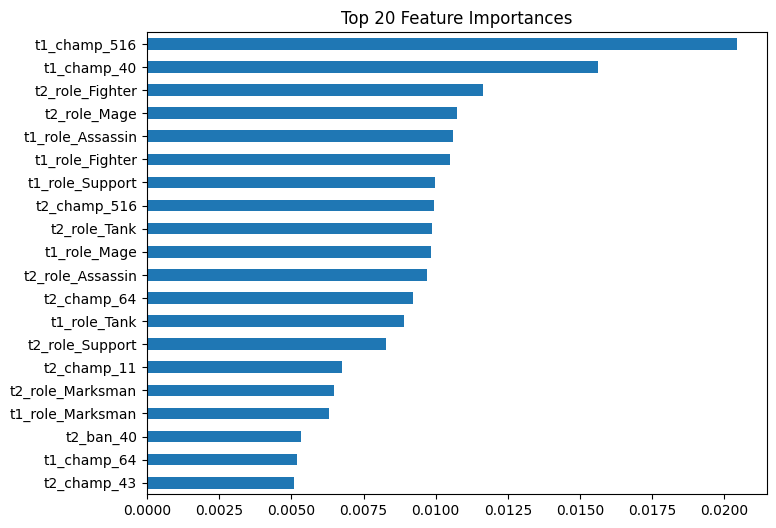

In [5]:
importances = clf.feature_importances_
feat_imp = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)

print(feat_imp.head(20))

# Plot top 20
feat_imp.head(20).plot(kind='barh', figsize=(8,6))
plt.title("Top 20 Feature Importances")
plt.gca().invert_yaxis()
plt.show()